In [1]:
import pandas as pd
df =pd.read_csv('211210-DRM-total.csv')

In [2]:
pre_df = df.iloc[:,71:76]


In [3]:
react_df= df.iloc[:,76:]

In [4]:
react_df['CO2/CH4'] = df.loc[:,'Reaction CO2']/ df.loc[:,'Reaction CH4']


In [5]:
react_df['CH4 GHSV'] = react_df.loc[:,'Reaction CH4']*react_df.loc[:,'GHSV']/100
react_df['CO2 GHSV'] = react_df.loc[:,'Reaction CO2']*react_df.loc[:,'GHSV']/100
react_df['Space Time'] = 1/react_df.loc[:,'GHSV']

In [6]:
import numpy as np

react_df['Reaction_Constant'] = -np.log(1 - react_df['CH4 Conversion']/100) * react_df['GHSV']


In [7]:
react_df = react_df.loc[:,['Reaction T','CO2/CH4','CH4 GHSV','CO2 GHSV','GHSV','Time on stream','CH4 Conversion','Reaction_Constant']]

In [8]:
react_df.head()

,Reaction T,CO2/CH4,CH4 GHSV,CO2 GHSV,GHSV,Time on stream,CH4 Conversion,Reaction_Constant
0,600,1.0,2.0,2.0,4.0,60,21,0.942889
1,600,1.0,2.0,2.0,4.0,60,39,1.977185
2,600,1.0,2.0,2.0,4.0,60,45,2.391348
3,600,1.0,2.0,2.0,4.0,60,48,2.615706
4,600,1.0,2.0,2.0,4.0,60,44,2.319274


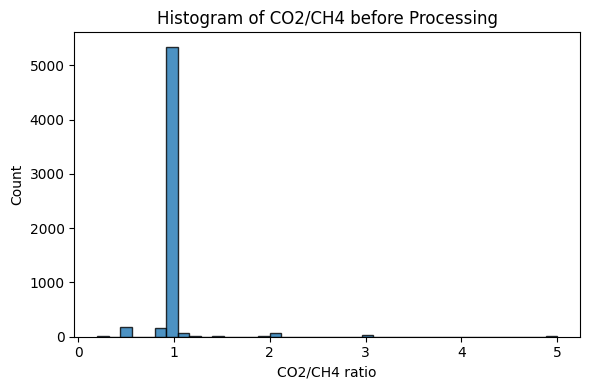

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['CO2/CH4'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('CO2/CH4 ratio')
plt.ylabel('Count')
plt.title('Histogram of CO2/CH4 before Processing')

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
react_df['CO2/CH4']= np.log(react_df['CO2/CH4'])

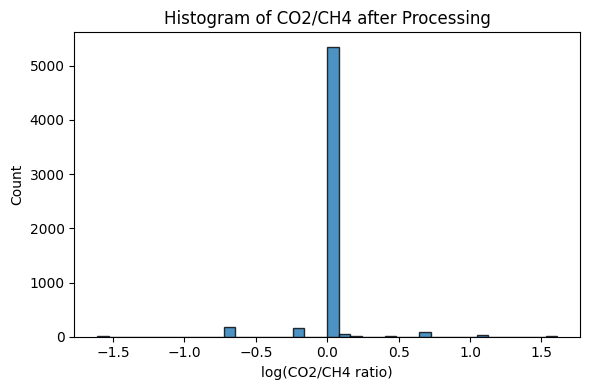

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['CO2/CH4'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('log(CO2/CH4 ratio)')
plt.ylabel('Count')
plt.title('Histogram of CO2/CH4 after Processing')

plt.tight_layout()
plt.show()


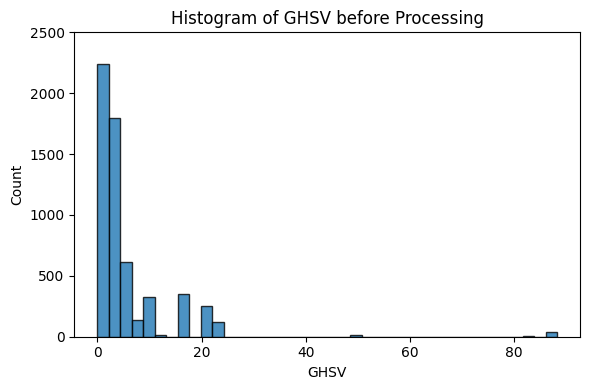

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['GHSV'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('GHSV')
plt.ylabel('Count')
plt.ylim(0,2500)
plt.title('Histogram of GHSV before Processing')

plt.tight_layout()
plt.show()


In [13]:
react_df['GHSV'] = np.log1p(react_df['GHSV'])

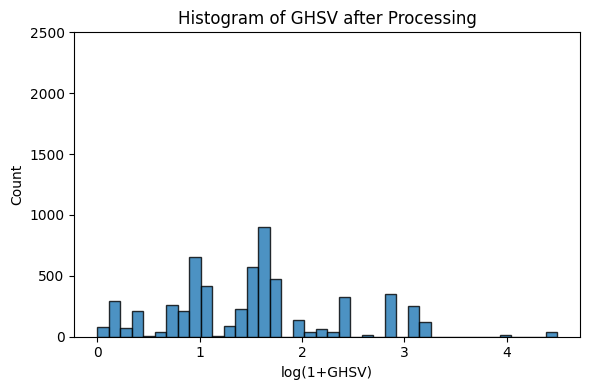

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['GHSV'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('log(1+GHSV)')
plt.ylabel('Count')
plt.ylim(0,2500)
plt.title('Histogram of GHSV after Processing')

plt.tight_layout()
plt.show()


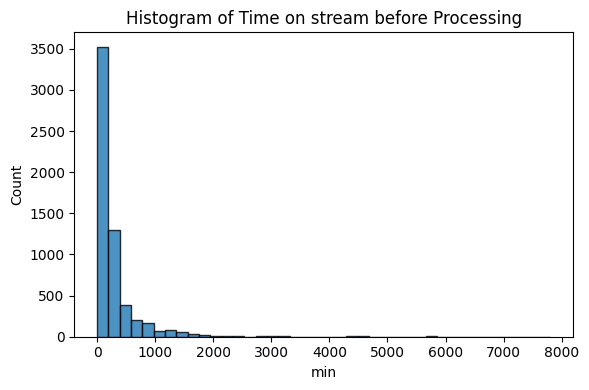

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['Time on stream'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('min')
plt.ylabel('Count')
plt.ylim(0,3700)
plt.title('Histogram of Time on stream before Processing')

plt.tight_layout()
plt.show()


In [16]:
react_df['Time on stream'] = np.log1p(react_df['Time on stream'])

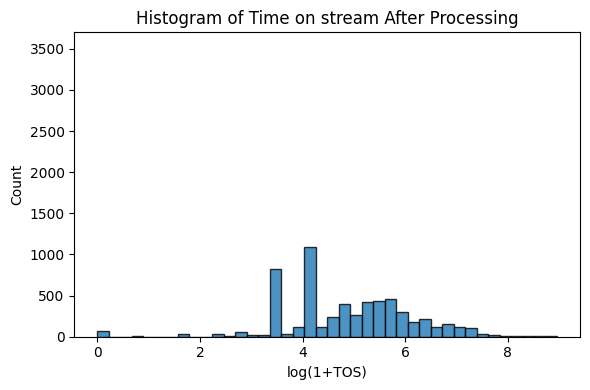

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(
    react_df['Time on stream'],
    bins=40,
    edgecolor='black',
    alpha=0.8
)

plt.xlabel('log(1+TOS)')
plt.ylabel('Count')
plt.ylim(0,3700)
plt.title('Histogram of Time on stream After Processing')

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
for col in ['CO2 GHSV','CH4 GHSV']:
    react_df[f'{col}']= np.log1p(react_df[col])

In [19]:
pre_re_df = pd.concat([pre_df,react_df],axis=1)
pre_re_without_df = pre_re_df.drop(columns=['Reaction_Constant'])

In [20]:
import  numpy as np
np.save('./data/pre_re_fin_1.npy',pre_re_df)
np.save('./data/pre_re_without_reac_1.npy',pre_re_without_df)

## 역변환

In [21]:
for col in ['Time on stream','CO2 GHSV','CH4 GHSV','GHSV']:
    react_df[col] = np.expm1(react_df[col])
react_df['CO2/CH4'] = np.exp(react_df['CO2/CH4'])

In [22]:
pre_re_df

,Calcination T,Calcination time,Reduction T,Reduction time,Reduction H2,Reaction T,CO2/CH4,CH4 GHSV,CO2 GHSV,GHSV,Time on stream,CH4 Conversion,Reaction_Constant
0,700,5.0,800,2.0,33.33,600,0.0,1.098612,1.098612,1.609438,4.110874,21,0.942889
1,700,5.0,800,2.0,33.33,600,0.0,1.098612,1.098612,1.609438,4.110874,39,1.977185
2,700,5.0,800,2.0,33.33,600,0.0,1.098612,1.098612,1.609438,4.110874,45,2.391348
3,700,5.0,800,2.0,33.33,600,0.0,1.098612,1.098612,1.609438,4.110874,48,2.615706
4,700,5.0,800,2.0,33.33,600,0.0,1.098612,1.098612,1.609438,4.110874,44,2.319274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,300,6.0,1000,24.0,40.00,700,0.0,0.117783,0.117783,0.405465,4.795791,81,0.830366
5904,300,6.0,1000,24.0,40.00,750,0.0,0.117783,0.117783,0.405465,4.795791,90,1.151293
5905,300,6.0,1000,24.0,40.00,800,0.0,0.117783,0.117783,0.405465,4.795791,95,1.497866
5906,300,6.0,1000,24.0,40.00,850,0.0,0.117783,0.117783,0.405465,4.795791,97,1.753279
